# Generating neurons with MCMC algorithm
This script presents the method of generating neuron using naive base Markov Chain Monte Carlo. The method can be summerize in two steps:
- Reading the database and extracing the fetur
- using MCMC to generate the neuron


### Imports

In [1]:
import numpy as np
import McNeuron
import matplotlib.pyplot as plt
from copy import deepcopy
from numpy.linalg import inv
from collections import Counter
import pickle
%matplotlib inline

## Load data

In [ ]:
path = "/Volumes/Arch/Dropbox/HG-GAN/03-Data/All Data/"
data = McNeuron.NeuronCollection.load_data(path)
Counter(data['Y']['Primary Cell Class'])

In [51]:
data = pickle.load(open( "sample_data.p", "rb" ))

## Get a subset of data

In [65]:
label = 'Archive Name'
name = 'Hamad'
sub_data = McNeuron.NeuronCollection.make_sub_data(data, label, name)

## Making Database

done!


/Users/RoozbehFarhoudi/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


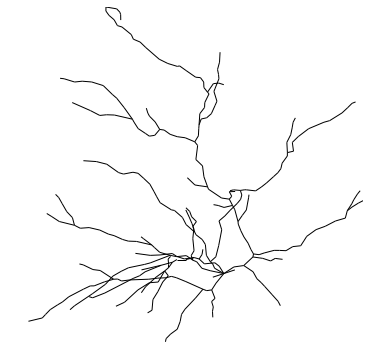

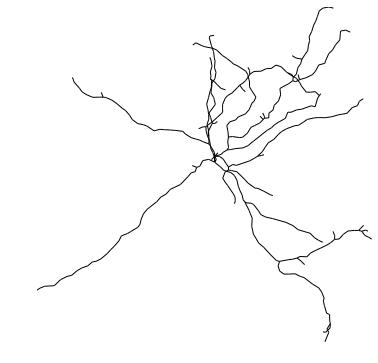

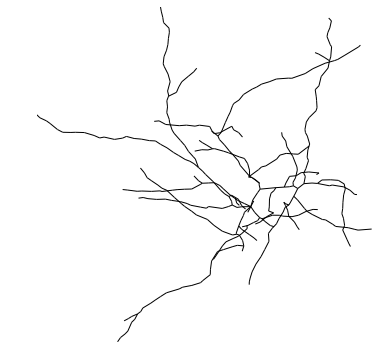

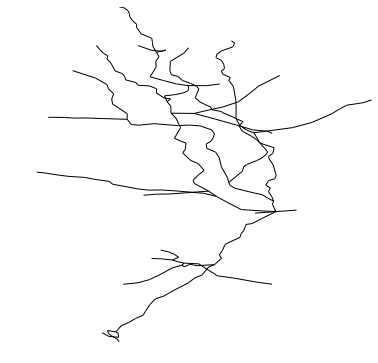

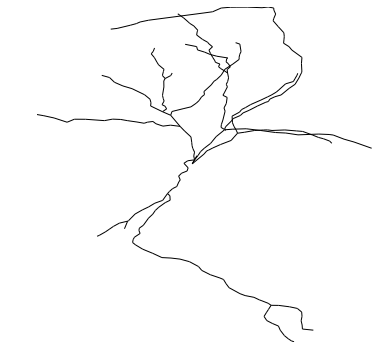

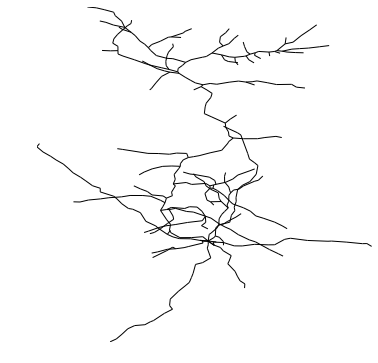

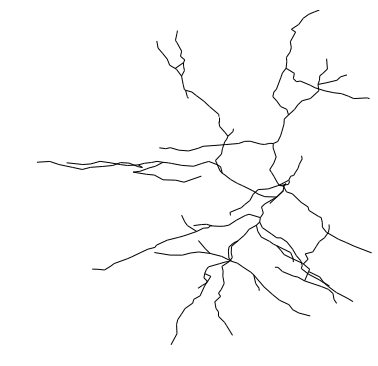

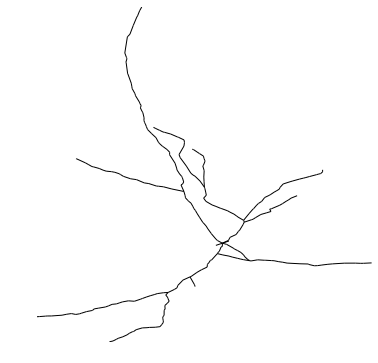

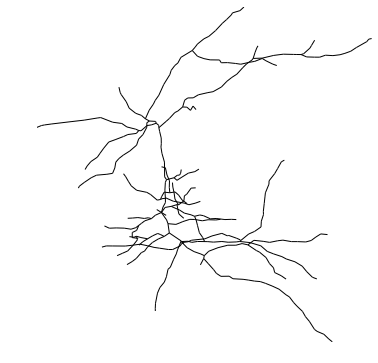

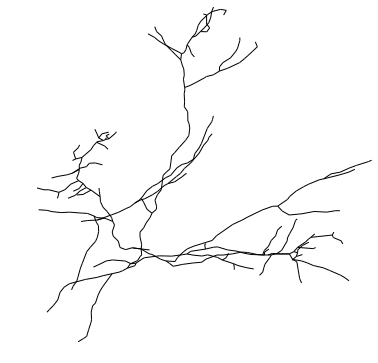

initial_segments
6.4
1.35646599663


segmental_neuronal/euclidean
0.0899049857372
0.0387459374507


neuronal/euclidean
0.298964741634
0.120625845911


Nbranch
29.2
13.8188277361


local_angle


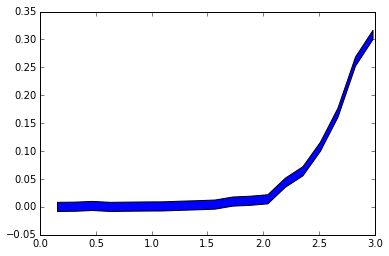

side_branch_angle


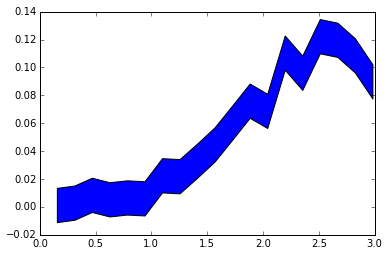

curvature


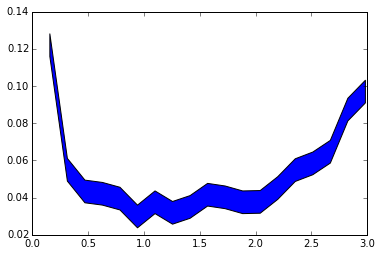

neural_important


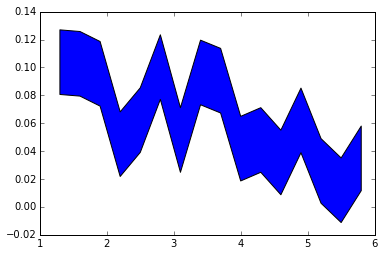

branch_angle


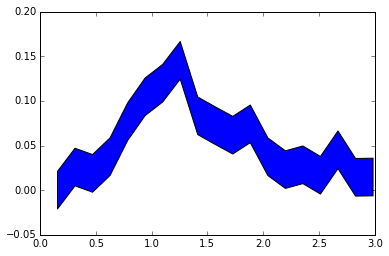

global_angle


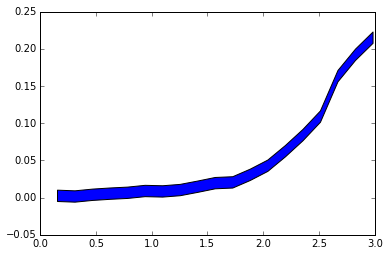

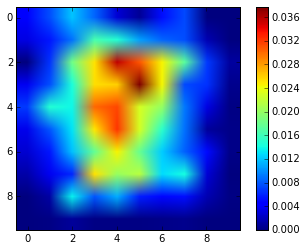

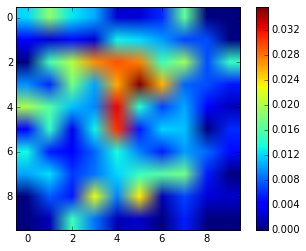

discrepancy_space


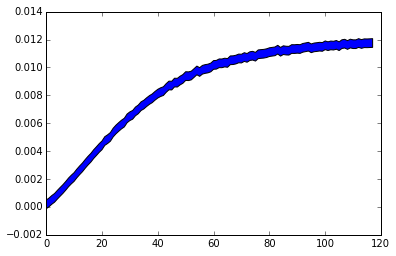

self_avoidance


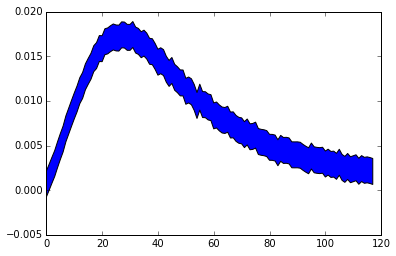

pictural_image_xy_tips


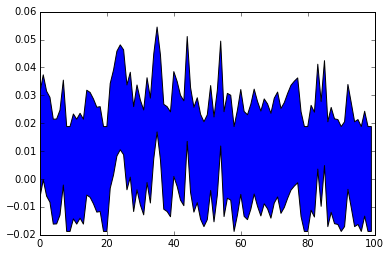

pictural_image_xy


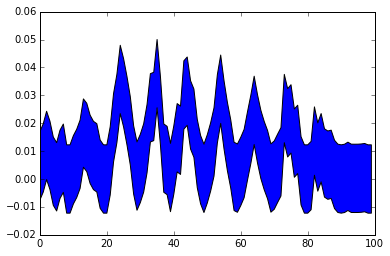

In [3]:
hist_features = {
    'branch_angle': np.arange(0,np.pi,np.pi/20),
    'side_branch_angle': np.arange(0,np.pi,np.pi/20),
    'global_angle': np.arange(0,np.pi,np.pi/20),
    'local_angle': np.arange(0,np.pi,np.pi/20),
    'curvature' : np.arange(0,np.pi,np.pi/20),
    'neural_important' : np.arange(1,6,.3),
    #'distance_from_parent' : np.arange(0,60,5),
    }
value_features = {
    #'Nnodes',
    'Nbranch',
    #'Nsoma',
    'initial_segments',
    #'ratio_neural_euclidian_important',
    #'ratio_euclidian_neuronal',
    #'Npassnode',
    'segmental_neuronal/euclidean',
    'neuronal/euclidean'
}
vec_value = {
    'pictural_image_xy',
    'pictural_image_xy_tips',
    'discrepancy_space',
    'self_avoidance',
    #'ratio_diameter_euclidean'
}
# c = McNeuron.NeuronCollection.Collection(input_format='swc', 
#                                           input_file=L_neuron[1830:1836])
c = McNeuron.NeuronCollection.Collection()
c.set_subsampling(400)
c.fit(input_format='Matrix of swc', input_file=sub_data['X'])
c.set_features()
c.hist_features = hist_features
c.vec_value = vec_value
c.set_value(list_features=value_features)
c.set_hist(list_features = hist_features,
           hist_range=hist_features)
c.set_vec_value(vec_value)
c.avoid_zero_std(.001)
McNeuron.visualize.show_database(c)

## Normlizer

In [5]:
normlizer = c.normlizor(3)
normlizer['pictural_image_xy'] *=1.35
normlizer['pictural_image_xy_tips'] *=1.35
normlizer['neuronal/euclidean'] *=1.5
normlizer['Nbranch'] *=.3
#normlizer['ratio_diameter_euclidean'] *=.3
normlizer['self_avoidance'] *=2
normlizer['local_angle'] *=1.5
normlizer['segmental_neuronal/euclidean'] *=.5
normlizer

{'Nbranch': 1.1601627763516587,
 'branch_angle': 13.076696830622023,
 'curvature': 13.076696830622016,
 'discrepancy_space': 0.1014508940416208,
 'global_angle': 13.076696830622023,
 'initial_segments': 4.2389562394532927,
 'local_angle': 19.615045245933032,
 'neural_important': 11.999999999999998,
 'neuronal/euclidean': 5.3276612830711452,
 'pictural_image_xy': 4.958469429304766,
 'pictural_image_xy_tips': 7.6118863160273014,
 'segmental_neuronal/euclidean': 1.7072243131072611,
 'self_avoidance': 0.94715775183462647,
 'side_branch_angle': 13.076696830622021}

## MCMC on database

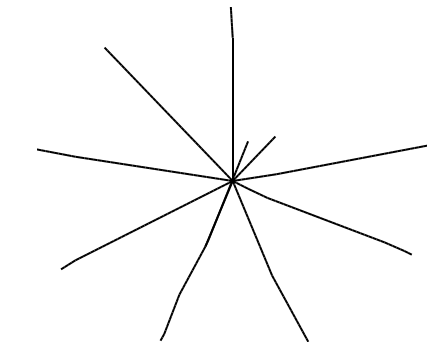

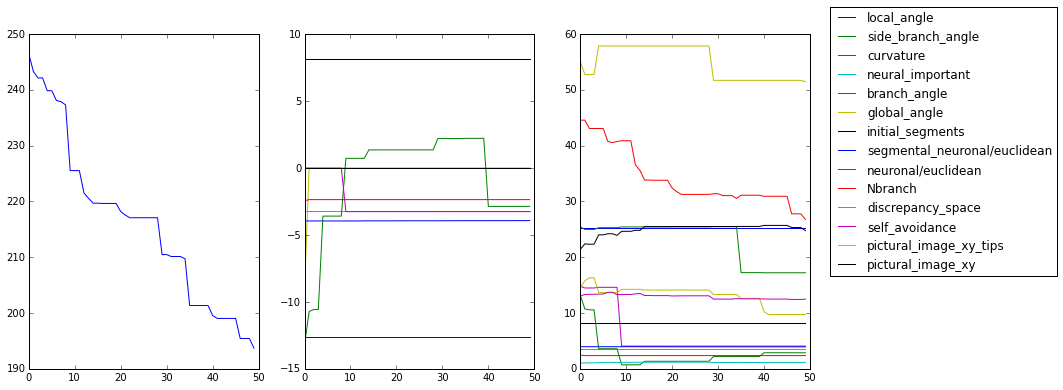

In [9]:
in_neuron = McNeuron.neuron_util.star_neuron(wing_number=9,
                                             spherical=None,
                                             node_on_each_wings=45,
                                             length=12)
#in_neuron = feature_neuron
#in_neuron = c.database[0]
per = McNeuron.MCMC(neuron=in_neuron, 
                    iterations=50, 
                    verbose=0)
mean_len = in_neuron.distance_from_parent.mean()
per.set_mean_var_length(mean=mean_len, var=mean_len/3)

per.hist_features=hist_features
per.value_features=value_features
per.vec_value=vec_value
per.set_verbose(0)
per.set_trend()
L = {
     'extension/reduction': 0,
     'extension/reduction end points': 0,
     #'add/remove' : 0.,
     #'rescale toward end' : 0,
     #'diameter' : 0.,
    
     'diameter_toward' : 0. ,

     'rotation for any node' : 3.,
     'rotation for branching' : 6.,
     #'location toward end' : 0.,
     #'location' : .1,
     #'location for important point' : .0,
    
     'sliding general' : .5,
     'sliding certain in distance' : 3.,
     'sliding for branching node' : 1.,
     'sliding for branching node certain distance' : 3.,
     #'stretching vertical' : .0,
     #'stretching horizental' : .0
}
per.kappa_rotation = 400.
per.rescale_value = 0
per.sliding_limit = 300.
per.horizental_stretch = .1
per.vertical_stretch = .1
per.location_toward_cte = .5
per.location_important = 5.
per.set_database(c)
per.set_feature_normalizer(normlizer)
per.set_probability(L)
per.fit()
gen = per.neuron
McNeuron.visualize.plot_2D(gen,dpi = 120, line_width=2,size_x = 6);
per.show_MCMC(1,14,6)
#McNeuron.neuron_util.check_neuron(per.neuron)
#per.neuron.show_features()

## Start from the current neuron

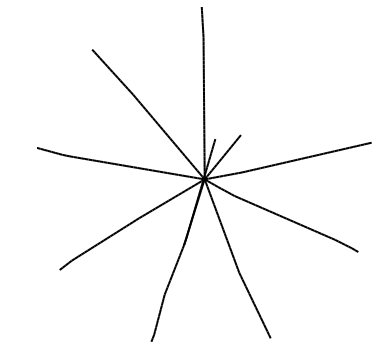

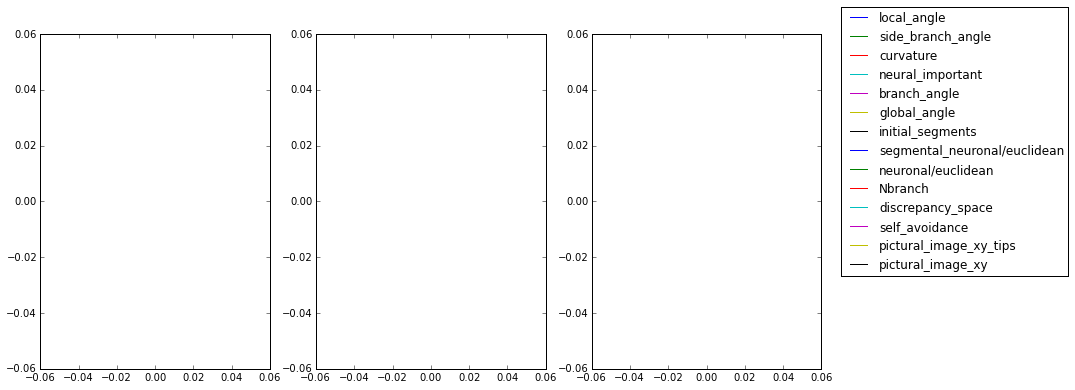

In [10]:
per.set_n_iteration(10)
per.set_verbose(0)
#per.set_feature_normalizer(normlizer)
#per.set_probability(L)
per.fit()
McNeuron.visualize.plot_2D(per.neuron, dpi = 120, line_width=2);
per.show_MCMC(200,14,6)
#per.neuron.show_features()

In [ ]:
per.set_n_iteration(1500)
per.set_verbose(0)
#per.set_feature_normalizer(normlizer)
per.fit()
McNeuron.visualize.plot_2D(per.neuron, dpi = 120, line_width=2);
per.show_MCMC(600,14,6)
#per.neuron.show_features()

## Evolution

In [ ]:
McNeuron.visualize.plot_evolution_mcmc(per)

## Save MCMC

In [ ]:
pickle.dump( per, open( "per5.p", "wb" ) )